In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv('/Users/NicolasSoto/Dropbox/Andes/Master Analytics/Modelos avanzados de analsis/Ejercicios 1/data_arma.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   ts1         500 non-null    float64
 2   ts2         500 non-null    float64
 3   ts3         500 non-null    float64
 4   ts4         500 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


,Unnamed: 0,ts1,ts2,ts3,ts4
0,0,0.533570,-0.126804,-0.802837,1.812825
1,1,1.240130,1.314360,-0.595602,0.042764
2,2,1.618598,1.405994,0.127180,-1.759427
3,3,1.140465,3.132621,0.958586,-0.456798
4,4,0.481561,3.179083,0.164598,-1.254790


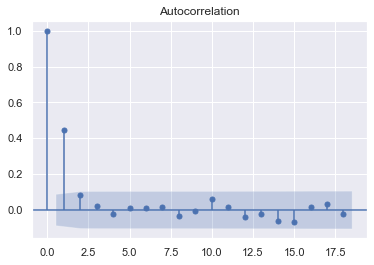

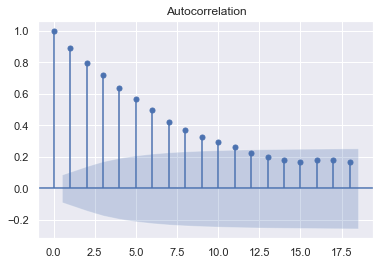

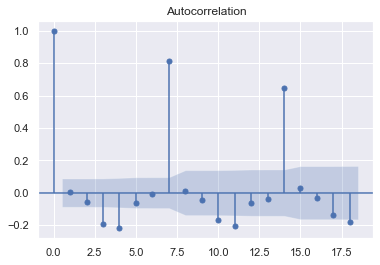

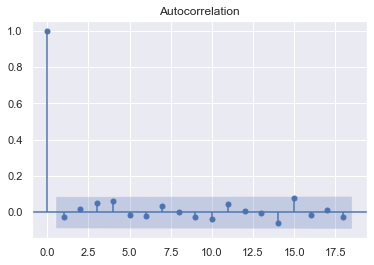

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.ts1, lags=18);
plot_acf(df.ts2, lags=18);
plot_acf(df.ts3, lags=18);
plot_acf(df.ts4, lags=18);

#### A raíz de las graficas de autocorrelacion total ACF podemos decir que las series ts1, ts3 y ts4  son series de media movil ya que las auto correlaciones decrecen drasticamente. Así mismo podemos decir que ts1 es de orden 2 y ts3 y ts4 de orden 1.

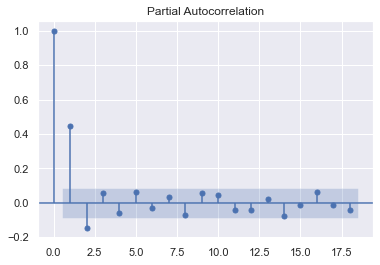

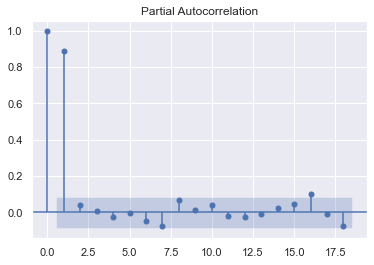

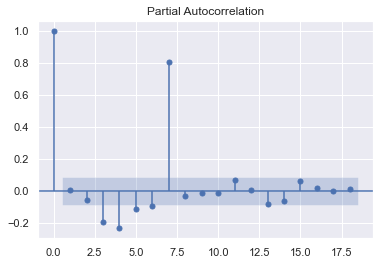

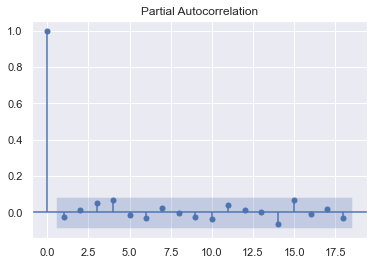

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df.ts1, lags=18);
plot_pacf(df.ts2, lags=18);
plot_pacf(df.ts3, lags=18);
plot_pacf(df.ts4, lags=18);



#### Las gráficas de Auto-correlación parcial permiten identificar la serie ts2 como autoregresiva de orden p= 2

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes
       Sales
Month       
1-01   266.0
1-02   145.9
1-03   183.1
1-04   119.3
1-05   180.3


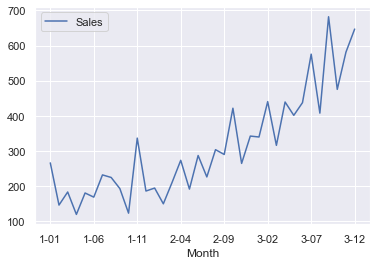

In [51]:
df = pd.read_csv('/Users/NicolasSoto/Dropbox/Andes/Master Analytics/Modelos avanzados de analsis/Ejercicios 1/shampoo.csv',
                index_col=0)
df.info()
print(df.head())

df.plot(figsize=(6,4));




In [40]:
'Dickey Fuller Test of Stationarity'

from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


#### Según el test de DF la serie de tiempo original no es estacionaria con una significancia de 0.05 por lo que se requiere diferenciar.

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


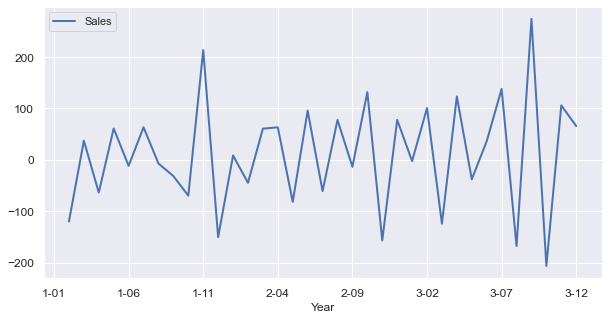

In [46]:
'Componente de Estacionaridad'

df.diff().plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12);

result = adfuller(df.diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#### Al realizar una diferenciación, se obtiene un p-value de 0, por lo tanto se puede concluir que la serie es estacionaria.

#### En busca de los parametros del modelo ARIMA se realizan gráficos de ACF y PACF como se muestra a continuación

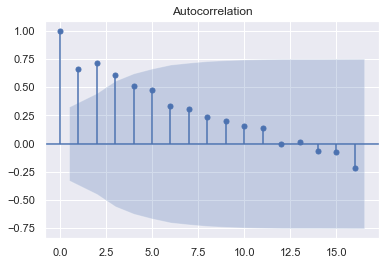

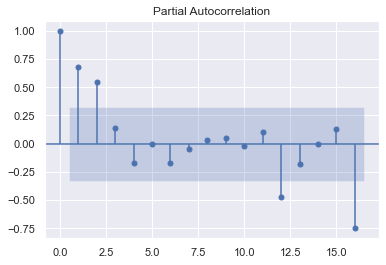

In [19]:
plot_acf(df);
plot_pacf(df);

#### Se concluye que la serie tiene como mejor parametro p=3 y una diferenciacion. Por lo tanto se ajusta a un ARIMA (3,1,0)

In [18]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(df, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -197.346
Method:                       css-mle   S.D. of innovations             66.848
Date:                Sat, 10 Jul 2021   AIC                            404.692
Time:                        18:37:33   BIC                            412.469
Sample:                             1   HQIC                           407.377
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9920      4.143      2.895      0.004       3.872      20.112
ar.L1.D.Sales    -1.0827      0.177     -6.126      0.000      -1.429      -0.736
ar.L2.D.Sales    -0.5481      0.249     

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [34]:
X = df.values
size = int(len(X) * 0.666)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(3,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
predictions = output
real_values = future

print(pd.DataFrame({'predict':predictions, 'real':real_values}))

       predict     real
0   363.496714  [342.3]
1   317.367672  [339.7]
2   396.243289  [440.4]
3   324.808439  [315.9]
4   388.153286  [439.3]
5   352.861466  [401.3]
6   402.763030  [437.4]
7   367.616971  [575.5]
8   408.465839  [407.6]
9   387.365865  [682.0]
10  420.164126  [475.3]
11  403.009333  [581.3]
12  430.245650  [646.9]


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [42]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 16994.709


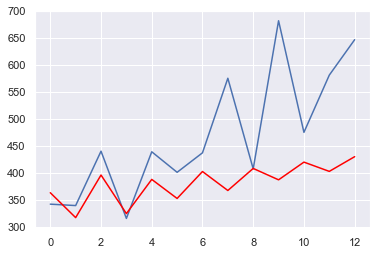

In [39]:
plt.plot(real_values)
plt.plot(predictions, color='red')
plt.show()

### Conclusión
### Se evidencia que el modelo va perdiendo precisión en el pronóstico, esto es quizás debido a los pocos datos y posiblemente el cambio de tendencia.